In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flags/Australia.svg
/kaggle/input/flags/Israel.svg
/kaggle/input/flags/Aruba.svg
/kaggle/input/flags/Lebanon.svg
/kaggle/input/flags/Holy See (Vatican City State).svg
/kaggle/input/flags/Czech Republic.svg
/kaggle/input/flags/Latvia.svg
/kaggle/input/flags/Uganda.svg
/kaggle/input/flags/Mali.svg
/kaggle/input/flags/Gibraltar.svg
/kaggle/input/flags/Colombia.svg
/kaggle/input/flags/Tanzania United Republic of.svg
/kaggle/input/flags/Vietnam.svg
/kaggle/input/flags/Christmas Island.svg
/kaggle/input/flags/Micronesia Federated States of.svg
/kaggle/input/flags/Dominican Republic.svg
/kaggle/input/flags/Brazil.svg
/kaggle/input/flags/Sweden.svg
/kaggle/input/flags/Equatorial Guinea.svg
/kaggle/input/flags/Namibia.svg
/kaggle/input/flags/Finland.svg
/kaggle/input/flags/Guam.svg
/kaggle/input/flags/Timor-Leste.svg
/kaggle/input/flags/Azerbaijan.svg
/kaggle/input/flags/Saint Helena Ascension and Tristan da Cunha.svg
/kaggle/input/flags/Cayman Islands.svg
/kaggle/input/flags/Myan

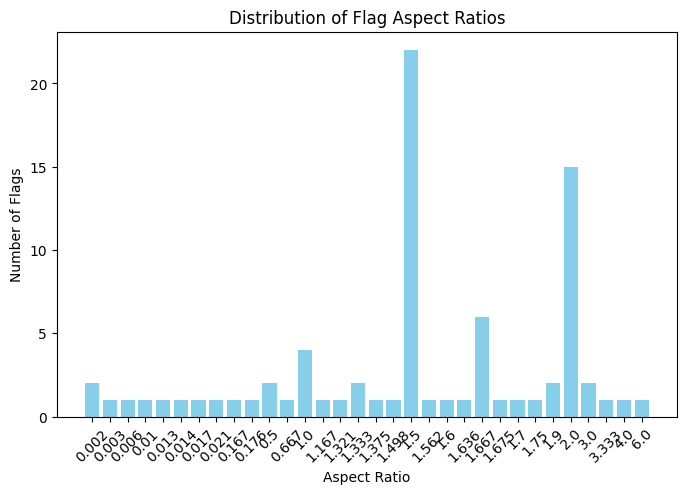

          Country  Width  Height  Aspect Ratio
0         Lebanon  750.0   500.0           1.5
1  Czech Republic  900.0   600.0           1.5
2            Mali  450.0   300.0           1.5
3       Gibraltar  512.0   256.0           2.0
4        Colombia    6.0     4.0           1.5


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to the flags directory
flags_dir = "/kaggle/input/flags"

# Function to extract width and height from an SVG file
def get_svg_dimensions(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()
    
    width_match = re.search(r'width=["\']([\d.]+)', content)
    height_match = re.search(r'height=["\']([\d.]+)', content)
    
    if width_match and height_match:
        width = float(width_match.group(1))
        height = float(height_match.group(1))
        return width, height
    return None, None

# Process all SVG files
flag_data = []

for file in os.listdir(flags_dir):
    if file.endswith(".svg"):
        file_path = os.path.join(flags_dir, file)
        width, height = get_svg_dimensions(file_path)
        if width and height:
            aspect_ratio = round(width / height, 3)  # Rounded for clarity
            flag_data.append({"Country": file.replace(".svg", ""), "Width": width, "Height": height, "Aspect Ratio": aspect_ratio})

# Convert to DataFrame
df = pd.DataFrame(flag_data)

# Count common aspect ratios
ratio_counts = df["Aspect Ratio"].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.bar(ratio_counts.index.astype(str), ratio_counts.values, color="skyblue")
plt.xlabel("Aspect Ratio")
plt.ylabel("Number of Flags")
plt.title("Distribution of Flag Aspect Ratios")
plt.xticks(rotation=45)
plt.show()

# Display DataFrame
print(df.head())


In [3]:
ratio_counts

Aspect Ratio
0.002     2
0.003     1
0.006     1
0.010     1
0.013     1
0.014     1
0.017     1
0.021     1
0.167     1
0.176     1
0.500     2
0.667     1
1.000     4
1.167     1
1.321     1
1.333     2
1.375     1
1.498     1
1.500    22
1.562     1
1.600     1
1.636     1
1.667     6
1.675     1
1.700     1
1.750     1
1.900     2
2.000    15
3.000     2
3.333     1
4.000     1
6.000     1
Name: count, dtype: int64

## Our dataset has a large number of 2:3 aspect ratios, and 1:2 aspect ratios. Those around the fibonacci based ratios are also pretty frequent.